# Convergent Cross Mapping Vegetation/Climate across different land cover types in East Africa 

In [26]:
%%html

<style>
    .jp-OutputArea-child {
        display: inline-block;
    }
</style>

In [27]:
from pyEDM import *
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from labellines import labelLine, labelLines
import re
import itertools
import seaborn as sns
sns.set(style='ticks', color_codes = True)

In [28]:
#Here is the main directory
OROMIA_TS_DIR = '/home/rgreen/tana-spin/rgreen/DroughtEDM/Data/Final_TS/oromia_df_normalized/'
#save figures to this folder
FIGURES = '/home/rgreen/tana-spin/rgreen/DroughtEDM/Figures/'
SMOOTHED_DIR = '/home/rgreen/tana-spin/rgreen/DroughtEDM/Data/Final_TS/smoothed/'

#Directory for seasonal decomposed time series
OROMIA_TS_DS = '/home/rgreen/tana-spin/rgreen/DroughtEDM/Data/Final_TS/oromia_df_seasonaldecomposed/'


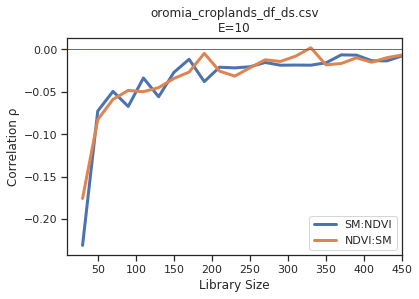

In [29]:
ccm_croplands_sm_ndvi_ds = CCM(pathIn = OROMIA_TS_DS, dataFile = 'oromia_croplands_df_ds.csv', E = 10, Tp = 2, tau = 1, columns = "SM", target = "NDVI", libSizes = "10 450 20", sample = 100, verbose = True,  showPlot = True) 

In [30]:
def ccm_vars_plot(in_dir, file, E, tau, Tp, libsize, sample, title):
    '''
    This function evaluates the cross map skill between two variables for a given land cover and area.
    
    Args:
    in_dir = path to directory of time series datasets
    lc = filename
    train = number of points in the time series to use for training, range separated by a space
    test = number of points in the time series to use for testing, range separated by a space
    title = label for figure of the area and land cover tested
    
    '''
    column_names = list(itertools.combinations(['NDVI', 'SM', 'TMP', 'P', 'LST', 'refET'],2))
    for i in column_names: 
        ccm_result = CCM(pathIn = in_dir, dataFile = file, E = E, tau = tau, Tp = Tp, libSizes = libsize, sample = sample, columns = i[0], target = i[1], verbose = True, showPlot = False)
        #ccm_result2 = EmbedDimension(pathIn = in_dir, dataFile = file, lib = train, pred = test, columns = i[1], target = i[0], showPlot = False)
        #fig, (ax1, ax2) = plt.subplots(1,2)
        fig = plt.figure()
        plt.plot(ccm_result.LibSize, ccm_result[str(i[0])+':'+str(i[1])], label = i[0] + r'$\rightarrow$' + i[1])
        plt.plot(ccm_result.LibSize, ccm_result[str(i[1])+':'+str(i[0])], label = i[1] + r'$\rightarrow$' + i[0])
        plt.xlabel('Library Size')
        plt.ylabel('Correlation ' r'$\rho$')
        plt.ylim(0, 1, 0.1)
        plt.title('Convergent Cross Mapping ' + title)
        #labelLines(plt.gca().get_lines(), zorder=2.5)
        plt.legend(loc = 'lower right', fontsize = 8, title = 'Cross Mapped Variables \n (Original' + r'$\rightarrow$' + 'Target)')
        plt.show()

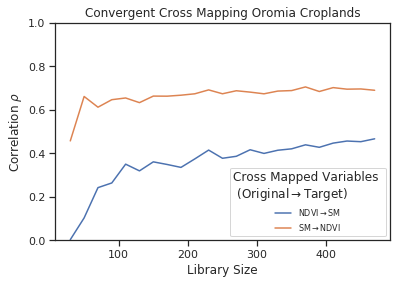

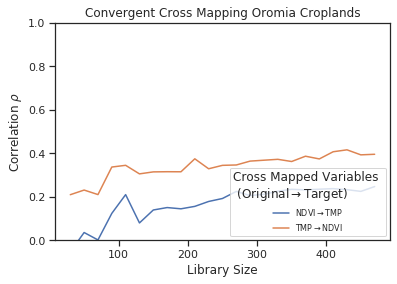

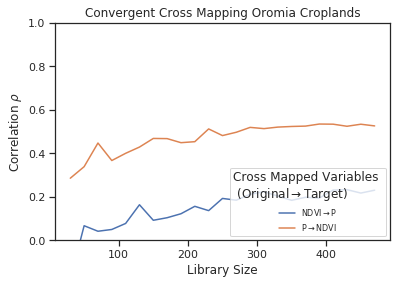

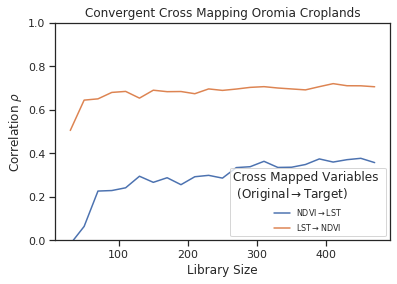

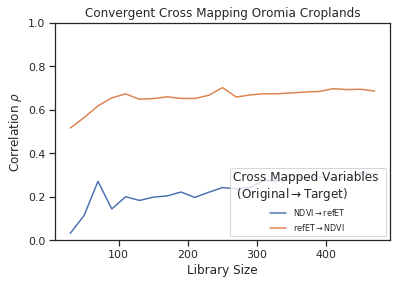

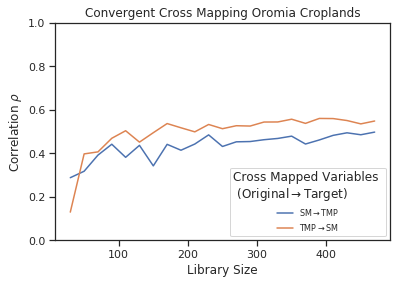

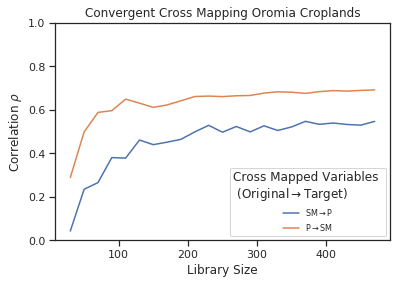

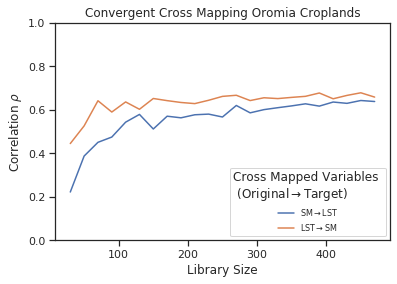

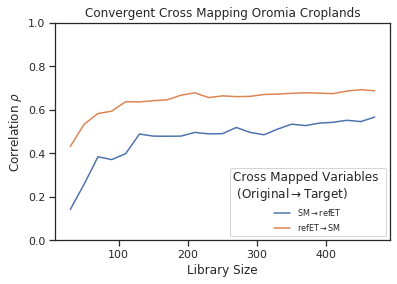

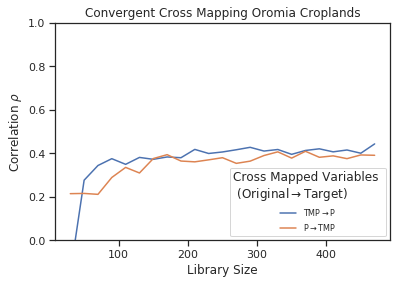

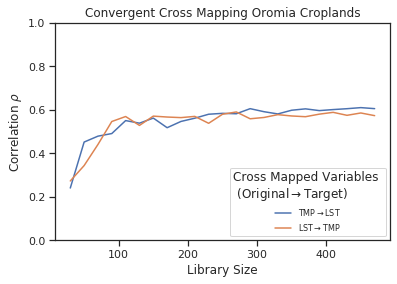

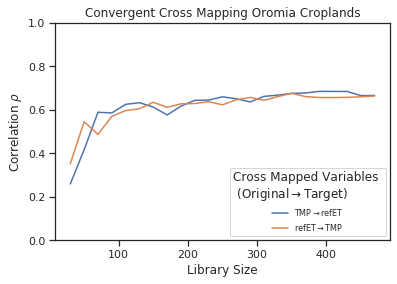

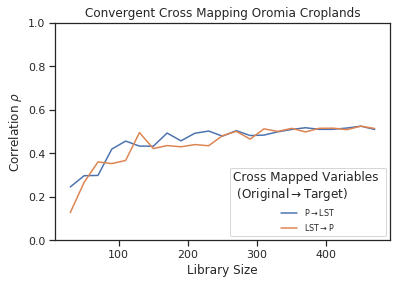

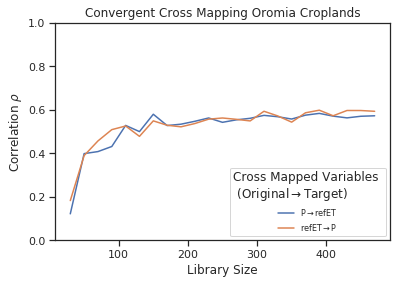

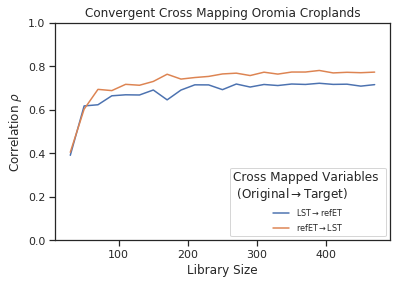

In [31]:
ccm_vars_plot(OROMIA_TS_DS, 'oromia_croplands_df_ds.csv', 10, -1, 0, '10 480 20', 10, 'Oromia Croplands')

In [32]:
#only run if you need to it taks a long time!!!
#increasing the sample size will smooth the plots but run slower


#ccm_vars_plot (OROMIA_TS_DS, 'oromia_croplands_df_ds.csv', 10, -1, 0, '10 480 20', 500, 'Oromia Croplands')

In [33]:
def ccm_vars_df(in_dir, file, E, tau, Tp, libsize, sample, title):
    '''
    This function creates dataframes of CCM results
    
    '''
    column_names = list(itertools.combinations(['NDVI', 'SM', 'TMP', 'P', 'LST', 'refET'],2))
    output = pd.DataFrame(list(range(1,26)), columns=['LibSize'])
     
    
    for i in column_names: 
        ccm_result1 = CCM(pathIn = in_dir, dataFile = file, E = E, tau = tau, Tp = Tp, libSizes = libsize, sample = sample, columns = i[0], target = i[1], verbose = True, showPlot = False)
        ccm_result2 = CCM(pathIn = in_dir, dataFile = file, E = E, tau = tau, Tp = Tp, libSizes = libsize, sample = sample, columns = i[1], target = i[0], verbose = True, showPlot = False)
        #ccm_result2 = EmbedDimension(pathIn = in_dir, dataFile = file, lib = train, pred = test, columns = i[1], target = i[0], showPlot = False)
        #fig, (ax1, ax2) = plt.subplots(1,2)
        col1 = i[0] + r'$\rightarrow$' + i[1]
        col2 = i[1] + r'$\rightarrow$' + i[0]
        output[col1] = ccm_result1[str(i[0])+':'+str(i[1])]
        output[col2] = ccm_result2[str(i[1])+':'+str(i[0])] 
        
    return output 
        
#         plt.plot(ccm_result.LibSize, ccm_result[str(i[0])+':'+str(i[1])], label = i[0] + r'$\rightarrow$' + i[1])
#         plt.plot(ccm_result.LibSize, ccm_result[str(i[1])+':'+str(i[0])], label = i[1] + r'$\rightarrow$' + i[0])
        

In [34]:
list(itertools.combinations(['NDVI', 'SM', 'TMP', 'P', 'LST', 'refET'],2))

[('NDVI', 'SM'),
 ('NDVI', 'TMP'),
 ('NDVI', 'P'),
 ('NDVI', 'LST'),
 ('NDVI', 'refET'),
 ('SM', 'TMP'),
 ('SM', 'P'),
 ('SM', 'LST'),
 ('SM', 'refET'),
 ('TMP', 'P'),
 ('TMP', 'LST'),
 ('TMP', 'refET'),
 ('P', 'LST'),
 ('P', 'refET'),
 ('LST', 'refET')]

In [35]:
ccm_combos = ccm_vars_df(OROMIA_TS_DS, 'oromia_croplands_df_ds.csv', 10, -1, 0, '10 480 20', 10, 'Oromia Croplands')
ccm_combos

,LibSize,NDVI$\rightarrow$SM,SM$\rightarrow$NDVI,NDVI$\rightarrow$TMP,TMP$\rightarrow$NDVI,NDVI$\rightarrow$P,P$\rightarrow$NDVI,NDVI$\rightarrow$LST,LST$\rightarrow$NDVI,NDVI$\rightarrow$refET,...,TMP$\rightarrow$LST,LST$\rightarrow$TMP,TMP$\rightarrow$refET,refET$\rightarrow$TMP,P$\rightarrow$LST,LST$\rightarrow$P,P$\rightarrow$refET,refET$\rightarrow$P,LST$\rightarrow$refET,refET$\rightarrow$LST
0,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2,-0.036455,0.557270,-0.095329,0.143886,-0.072739,0.298533,0.084069,0.566544,-0.081544,...,0.342787,0.159714,0.341198,0.396676,0.230378,0.211665,0.249566,0.194587,0.482749,0.569066
2,3,0.288285,0.580840,0.049181,0.161222,0.056904,0.397595,0.129053,0.634742,-0.019745,...,0.338448,0.495899,0.490584,0.499820,0.363661,0.280281,0.443156,0.419452,0.608027,0.692379
3,4,0.255863,0.674791,0.107977,0.248858,0.103514,0.342308,0.194715,0.685311,0.041353,...,0.502046,0.539194,0.567097,0.542392,0.458357,0.360310,0.424012,0.485768,0.595468,0.693861
4,5,0.243859,0.688035,0.057492,0.290391,0.020433,0.423893,0.144538,0.609260,0.105967,...,0.521071,0.483365,0.583090,0.519624,0.377602,0.463952,0.434107,0.452177,0.662636,0.721334
5,6,0.338403,0.667531,0.039914,0.238100,0.116314,0.431849,0.223433,0.635169,0.109946,...,0.542733,0.518907,0.572158,0.607215,0.436512,0.345325,0.480733,0.515543,0.690900,0.701554
6,7,0.325514,0.657846,0.117960,0.288995,0.145412,0.452172,0.174943,0.696581,0.254116,...,0.527037,0.549581,0.620141,0.605528,0.390477,0.442071,0.461674,0.504729,0.656736,0.747842
7,8,0.349110,0.662369,0.164305,0.349301,0.058222,0.437889,0.251788,0.642010,0.263965,...,0.571255,0.564807,0.608664,0.597974,0.471923,0.423314,0.518937,0.514138,0.696675,0.744184
8,9,0.323593,0.640360,0.169687,0.317454,0.098416,0.474858,0.320838,0.657096,0.208614,...,0.547776,0.573552,0.639403,0.610699,0.462009,0.456981,0.537899,0.539639,0.692609,0.717475
9,10,0.339495,0.673722,0.176871,0.358864,0.127734,0.474059,0.273940,0.664864,0.242272,...,0.558712,0.577556,0.653651,0.645470,0.487508,0.475505,0.505730,0.559933,0.693555,0.761559


In [36]:
def max_ccm(df):
    
    '''
    This function finds the maximum value in every ccm combination across the library size. 
    
    Args:
    df = dataframe of all ccm combination rho outputs
    
    '''        
    columns = df.columns[1:]
    #output = pd.DataFrame(list(range(1,31)), columns=['xmap'])
    output = []
    
    for i in columns:
        ccm_rho = df[i]
        max_rho = ccm_rho.max()
        output.append(max_rho)
    return output

def diff_max_ccm(max_list):
    '''
    This function takes the difference between the maximum values of each ccm combination and creates a new dataframe
    
    Args:
    max_list = list of maximum values from ccm outputs
    
    '''        
    
    diff_df = pd.DataFrame()
    var_names = list(itertools.combinations(['NDVI', 'SM', 'TMP', 'P', 'LST', 'refET'],2))
    it = iter(max_list)
    
    diff_list = []
    for a, b in zip(it, it):
        diff1 = a-b
        diff2 = b-a
        diff_list.append(diff1)
        diff_list.append(diff2)
        diff_df['xmap'] = list(ccm_combos.columns[1:])
    
    diff_df['xmap'] = list(ccm_combos.columns[1:])
    diff_df['max_diff']= diff_list

    return diff_df
        


        
        

In [37]:
ccm_max_list = max_ccm(ccm_combos)

In [38]:
ccm_max_list

[0.4582360374462816,
 0.7000755799072601,
 0.2691770835730888,
 0.40019669266849983,
 0.23152553101160067,
 0.5483495689587603,
 0.36778373746385573,
 0.7128605599799128,
 0.29295315492097873,
 0.7037031847843561,
 0.49794229024551173,
 0.5652102162607127,
 0.5330034133790968,
 0.697164600033608,
 0.6532726521716287,
 0.6727070562158314,
 0.5588948516795795,
 0.6854471008500159,
 0.45066239838814637,
 0.4222321706428513,
 0.6150462314987355,
 0.5811139370081537,
 0.6783070754538726,
 0.6664104387260518,
 0.5134631861230854,
 0.5375871850021624,
 0.5838553330629128,
 0.5985503319627167,
 0.7267811617797799,
 0.777562675865819]

In [39]:
maxdiff_combos = diff_max_ccm(ccm_max_list)
maxdiff_combos

,xmap,max_diff
0,NDVI$\rightarrow$SM,-0.241840
1,SM$\rightarrow$NDVI,0.241840
2,NDVI$\rightarrow$TMP,-0.131020
3,TMP$\rightarrow$NDVI,0.131020
4,NDVI$\rightarrow$P,-0.316824
5,P$\rightarrow$NDVI,0.316824
6,NDVI$\rightarrow$LST,-0.345077
7,LST$\rightarrow$NDVI,0.345077
8,NDVI$\rightarrow$refET,-0.410750
9,refET$\rightarrow$NDVI,0.410750


In [40]:
maxdiff_combos.columns.str.split('_').str[0]

Index(['xmap', 'max'], dtype='object')

In [61]:
def get_target_var(xmap_string):
    return xmap_string.split("$\\rightarrow$",1)[0]
def get_causal_var(xmap_string):
    return xmap_string.split("$\\rightarrow$",1)[1]


In [62]:
maxdiff_combos_sorted = maxdiff_combos.sort_values('xmap')
maxdiff_combos_sorted['causal_var'] = (maxdiff_combos_sorted['xmap'].map(get_causal_var))
maxdiff_combos_sorted['target_var'] = (maxdiff_combos_sorted['xmap'].map(get_target_var))

#maxdiff_combos_sorted.join(maxdiff_combos_sorted.xmap.apply(lambda s: pd.Series({'target_var':s.split('rightarrow$', 1)[1]})))
                                                                                                      #', 'causal_var':s-1})))'
#maxdiff_combos_sorted.insert(1, 'target_var', ['LST']*5 + ['NDVI']*5 + ['P']*5 + ['SM']*5 + ['TMP']*5 + ['refET']*5)
#maxdiff_combos_sorted['causal_var'] = maxdiff_combos_sorted.apply(lambda row: add())

#maxdiff_combos_sorted.join(maxdiff_combos_sorted['xmap'].apply(lambda s: pd.Series({'causal_var':s.split("rightarrow$",1)[1]})))
#maxdiff_combos_sorted.insert(2, 'causal_var', (maxdiff_combos_sorted['xmap'].values.split("rightarrow$",1)[1]))
maxdiff_combos_sorted

#maxdiff_combos[maxdiff_combos['xmap'].str.startswith('NDVI')]

,xmap,max_diff,causal_var,target_var
7,LST$\rightarrow$NDVI,0.345077,NDVI,LST
25,LST$\rightarrow$P,0.024124,P,LST
15,LST$\rightarrow$SM,0.019434,SM,LST
21,LST$\rightarrow$TMP,-0.033932,TMP,LST
28,LST$\rightarrow$refET,-0.050782,refET,LST
6,NDVI$\rightarrow$LST,-0.345077,LST,NDVI
4,NDVI$\rightarrow$P,-0.316824,P,NDVI
0,NDVI$\rightarrow$SM,-0.241840,SM,NDVI
2,NDVI$\rightarrow$TMP,-0.131020,TMP,NDVI
8,NDVI$\rightarrow$refET,-0.410750,refET,NDVI


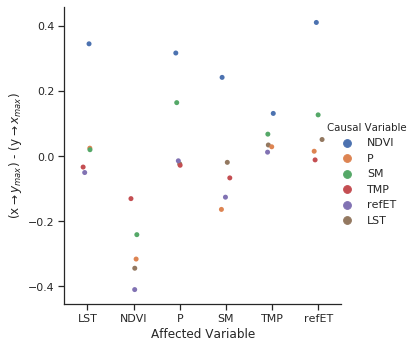

In [73]:
#plt1 = 
ax = sns.catplot(x='target_var', y='max_diff', hue = 'causal_var', data = maxdiff_combos_sorted)
ax.set(xlabel = 'Affected Variable', ylabel = '(x$\\rightarrow$$y_{max}$) - (y$\\rightarrow$$x_{max}$)')
ax._legend.set_title('Causal Variable')

# for line in range(0,df.shape[0]):
#      plt1.text(maxdiff_combos_sorted.target_var[line]+0.2, maxdiff_combos_sorted.max_diff[line], maxdiff_combos_sorted.xmap[line], horizontalalignment='left', size='medium', color='black', weight='semibold')
        
# sns.plt.show()

In [44]:
ex_string = maxdiff_combos_sorted.iloc[0, 0]
ex_string

'LST$\\rightarrow$NDVI'

In [59]:
print(ex_string.split("$\\rightarrow$",1)[0])

LST
